In [1]:
from systems import syst_create_smti
from systems import get_S_imp
from funcs import get_params
import kwant
from funcs import tun_con
import numpy as np
from funcs import calc_energies
import pandas as pd
import matplotlib.pyplot as plt

/Users/declanburke/opt/anaconda3/lib/python3.7/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
params = dict(hbar=1,
                    mu=0.014823834205238105,
                    V=0,
                    mu_m=1.6,
                    vF=3,#for Bi2Se3-based 3DTI, 10^15 canceled out with hbar
                    m0=-0.005,
                    m1=15,
                    Msysz=0.015,
                    Msysx=.0,
                    Msysy=.0,
                    Mz=0.1,
                    Mx=.0,
                    My=.0,
                    a=10,
                    phi_0=1.0,
                    exp=np.exp,
                    Smag_imp=0.04,
                    # Smag_mimp=.0,
                    # Stheta_mimp=np.pi/2,
                    # Sphi_mimp=.0,
                    disorder_imp=np.zeros([1, 1]),
                    # correlation_length=35,
                    re=lambda x: x.real,
                    im=lambda x: x.imag,
                    Delta=lambda x: 0.005 if x >= 1000 else 0,
                    S_imp=get_S_imp("")
                    )

In [17]:
fsyst=syst_create_smti(1100, 400, False)

In [5]:
energies, states, densities=calc_energies(syst_create_smti(1100,400, False), params, 8, 4)

In [12]:
densities[0].shape

(4,)

In [11]:
x=np.linspace(0,110,111)
y=np.linspace(0,40,41)
X,Y=np.meshgrid(x,y)
plt.pcolormesh(X, Y densities[0].reshape(11,41))

SyntaxError: invalid syntax (<ipython-input-11-6629988dc368>, line 4)

In [ ]:
def plot_2d_disorder(L, W, n_dis, corrL, L_normal):
    fsyst=syst_create_mti(L, W)
    disorder=get_disorder2(n_dis, S_mag, corrL, L, W, L_normal)
    
    x=np.linspace(0,int((L/10)),int((L/10)+1))
    y=np.linspace(0,int((W/10)),int((W/10)+1))
    X,Y=np.meshgrid(x,y)
    plt.pcolormesh(X, Y, disorder)

In [15]:
densities.shape

(4551, 4)

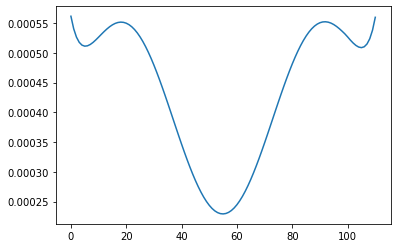

In [18]:
# 1D plotter, averaged across width of sample

L=1100
W=400
sitesx_list=np.array([site.pos[0] for site in fsyst.sites])
sitesy_list=np.array([site.pos[1] for site in fsyst.sites])

# WF=densities[0]+densities[1]
# mesh=np.vstack((sitesx_list, sitesy_list ,WF))
# mesh.shape

wfs1=[]
wfs2=[]
for x in range(len(sitesx_list)):
    wfs1.append(densities[x][0])
    wfs2.append(densities[x][1])
    
WFS1=np.array(wfs1) 
WFS2=np.array(wfs2) 
# x1=WFS1.reshape(1,45141)
# x2=WFS2.reshape(1,45141)
WF=WFS1+WFS2
WFplot=WF.reshape(int((L/10)+1), int((W/10)+1))

mesh=np.vstack((sitesx_list, sitesy_list ,WF)).T
mesh.shape

values=pd.DataFrame(data=mesh, columns=['sitesx_list', 'sitesy_list', 'WF']).groupby(['sitesx_list']).mean()

plt.plot(np.linspace(0,110,111), values['WF'])

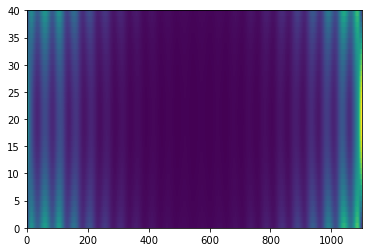

In [34]:
# 2D Plotter 

y=np.linspace(0,int(L/10), int((L/10)+1))
x=np.linspace(0,int(W/10), int((W/10)+1))
X,Y=np.meshgrid(x,y)
plt.pcolormesh(Y, X, WFplot)